MSE:  0.039094801863112705
RMSE:  0.19772405484187477


C:\Users\ahsani2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


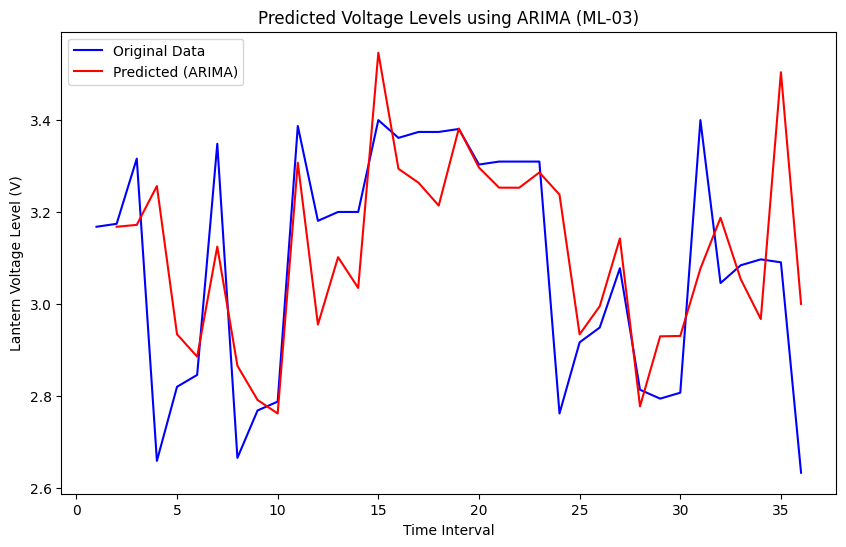

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.arima.model import ARIMA

# Function to load dataset from Excel file into numpy arrays
def load_dataset(filename):
    data = pd.read_excel(filename)  # Assuming the Excel file has two columns
    X = data.iloc[:, 0].values.reshape(-1, 1)  # Assuming first column is time intervals
    y = data.iloc[:, 1].values.reshape(-1, 1)  # Assuming second column is voltage levels
    return X, y

# Loading dataset
time_intervals, voltage_levels = load_dataset(r'C:\Users\ahsani2\Documents\03- AI part\QuarterSpaced_ML3.xlsx')

# Define the ARIMA model parameters
p = 5  # autoregressive order
d = 1  # differencing order
q = 2  # moving average order

# Fit the ARIMA model
model = ARIMA(voltage_levels, order=(p, d, q))
model_fit = model.fit()

# Make predictions
y_pred = model_fit.fittedvalues

# Compute MSE
mse = mean_squared_error(voltage_levels[d:], y_pred[d:])
print("MSE: ", mse)
print("RMSE: ", math.sqrt(mse))

# Plotting the original data and predicted values
plt.figure(figsize=(10, 6))

# Plotting the original data
plt.plot(time_intervals, voltage_levels, color='blue', label='Original Data')

# Plotting the predicted values using ARIMA
plt.plot(time_intervals[d:], y_pred[d:], color='red', label='Predicted (ARIMA)')

plt.xlabel('Time Interval')
plt.ylabel('Lantern Voltage Level (V)')
plt.title('Predicted Voltage Levels using ARIMA (ML-03)')
plt.legend()
plt.show()


MSE:  0.02859007821963027
RMSE:  0.16908600834968654


C:\Users\ahsani2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


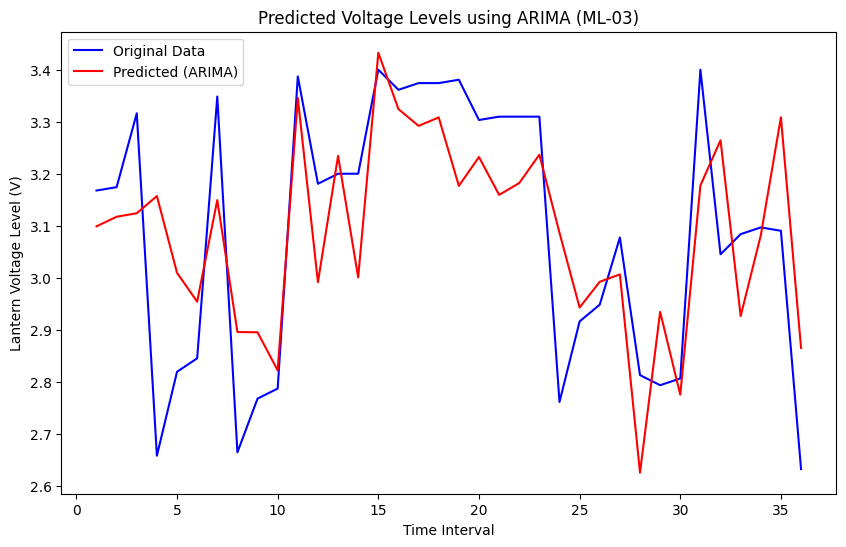

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.arima.model import ARIMA

# Function to load dataset from Excel file into numpy arrays
def load_dataset(filename):
    data = pd.read_excel(filename)  # Assuming the Excel file has two columns
    X = data.iloc[:, 0].values.reshape(-1, 1)  # Assuming first column is time intervals
    y = data.iloc[:, 1].values.reshape(-1, 1)  # Assuming second column is voltage levels
    return X, y

# Loading dataset
time_intervals, voltage_levels = load_dataset(r'C:\Users\ahsani2\Documents\03- AI part\QuarterSpaced_ML3.xlsx')

# Define the ARIMA model parameters
p = 5  # autoregressive order
d = 0  # differencing order
q = 5  # moving average order

# Fit the ARIMA model
model = ARIMA(voltage_levels, order=(p, d, q))
model_fit = model.fit()

# Make predictions
y_pred = model_fit.fittedvalues

# Compute MSE
mse = mean_squared_error(voltage_levels[d:], y_pred[d:])
print("MSE: ", mse)
print("RMSE: ", math.sqrt(mse))

# Plotting the original data and predicted values
plt.figure(figsize=(10, 6))

# Plotting the original data
plt.plot(time_intervals, voltage_levels, color='blue', label='Original Data')

# Plotting the predicted values using ARIMA
plt.plot(time_intervals[d:], y_pred[d:], color='red', label='Predicted (ARIMA)')

plt.xlabel('Time Interval')
plt.ylabel('Lantern Voltage Level (V)')
plt.title('Predicted Voltage Levels using ARIMA (ML-03)')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

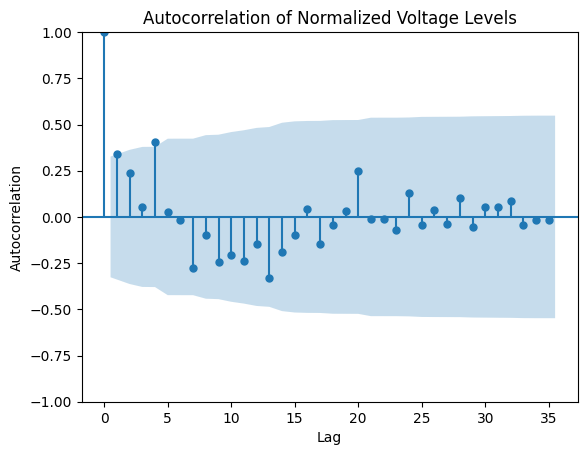

<Figure size 1000x600 with 0 Axes>

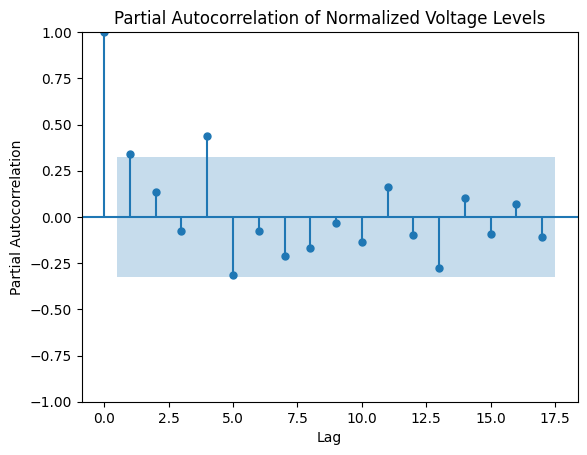

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to load dataset from Excel file into numpy arrays
def load_dataset(filename):
    data = pd.read_excel(filename)  # Assuming the Excel file has two columns
    X = data.iloc[:, 0].values.reshape(-1, 1)  # Assuming first column is time intervals
    y = data.iloc[:, 1].values.reshape(-1, 1)  # Assuming second column is voltage levels
    return X, y

# Loading dataset
time_intervals, voltage_levels = load_dataset(r'C:\Users\ahsani2\Documents\03- AI part\QuarterSpaced_ML3.xlsx')

# Normalize the data
scaler = MinMaxScaler()
normalized_voltage_levels = scaler.fit_transform(voltage_levels)

# Plotting the autocorrelation function
plt.figure(figsize=(10, 6))
plot_acf(normalized_voltage_levels, lags=35)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Normalized Voltage Levels')
plt.show()

# Plotting the partial autocorrelation function
plt.figure(figsize=(10, 6))
plot_pacf(normalized_voltage_levels, lags=17)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation of Normalized Voltage Levels')
plt.show()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Function to load dataset from Excel file into numpy arrays
def load_dataset(filename):
    data = pd.read_excel(filename)  # Assuming the Excel file has two columns
    X = data.iloc[:, 0].values.reshape(-1, 1)  # Assuming first column is time intervals
    y = data.iloc[:, 1].values.reshape(-1, 1)  # Assuming second column is voltage levels
    return X, y

# Function to perform the ADF test
def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %f' % (key, value))

# Function to determine the differencing order
def determine_differencing_order(timeseries, max_diff=3):
    for d in range(max_diff+1):
        diff_series = np.diff(timeseries, n=d)
        print(f"ADF Test for d={d}:")
        adf_test(diff_series)
        print("\n")
        if adfuller(diff_series)[1] <= 0.05:
            print(f"Series is stationary at differencing order d={d}")
            return d
    print("Series is not stationary even after maximum differencing.")
    return max_diff

# Loading dataset
time_intervals, voltage_levels = load_dataset(r'C:\Users\ahsani2\Documents\03- AI part\QuarterSpaced_ML3.xlsx')

# Determine the differencing order
d = determine_differencing_order(voltage_levels)
print(f"Determined differencing order: d={d}")


ADF Test for d=0:
ADF Statistic: -3.650477
p-value: 0.004866
Critical Value (1%): -3.632743
Critical Value (5%): -2.948510
Critical Value (10%): -2.613017


Series is stationary at differencing order d=0
Determined differencing order: d=0


Test MSE:  0.03033301705972893
Test RMSE:  0.174163765059581


C:\Users\ahsani2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


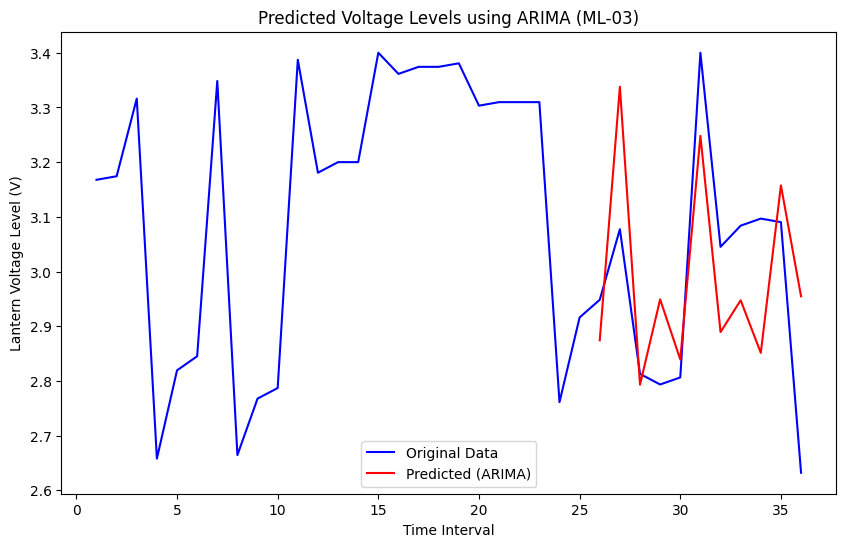

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.arima.model import ARIMA

# Function to load dataset from Excel file into numpy arrays
def load_dataset(filename):
    data = pd.read_excel(filename)  # Assuming the Excel file has two columns
    X = data.iloc[:, 0].values.reshape(-1, 1)  # Assuming first column is time intervals
    y = data.iloc[:, 1].values.reshape(-1, 1)  # Assuming second column is voltage levels
    return X, y

# Loading dataset
time_intervals, voltage_levels = load_dataset(r'C:\Users\ahsani2\Documents\03- AI part\QuarterSpaced_ML3.xlsx')

# Split the dataset into training and testing sets
train_size = int(len(voltage_levels) * 0.7)
train, test = voltage_levels[:train_size], voltage_levels[train_size:]
time_intervals_train, time_intervals_test = time_intervals[:train_size], time_intervals[train_size:]

# Define the ARIMA model parameters
p = 5  # autoregressive order
d = 1  # differencing order
q = 2  # moving average order

# Fit the ARIMA model on the training set
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Make predictions on the test set
y_pred = model_fit.forecast(steps=len(test))

# Compute MSE on the test set
mse = mean_squared_error(test, y_pred)
print("Test MSE: ", mse)
print("Test RMSE: ", math.sqrt(mse))

# Plotting the original data and predicted values
plt.figure(figsize=(10, 6))

# Plotting the original data
plt.plot(time_intervals, voltage_levels, color='blue', label='Original Data')

# Plotting the predicted values on the test set
plt.plot(time_intervals_test, y_pred, color='red', label='Predicted (ARIMA)')

plt.xlabel('Time Interval')
plt.ylabel('Lantern Voltage Level (V)')
plt.title('Predicted Voltage Levels using ARIMA (ML-03)')
plt.legend()
plt.show()
